## my name : sameh mohamed ismail deabes 
## task : The Spark Fuondation intern Data Science and Business Analytics
## #task6 : prediction using Decision tree Algorithms 


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree, datasets

from sklearn.metrics import classification_report, confusion_matrix


## load and prepare datasets and split to train and test  

In [67]:
# prepare dataset 
data = pd.read_csv('Iris.csv')
new_data = data.drop(['Id'], axis=1)
new_data


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [69]:
# split data to train and test and git targat 
X,y= new_data.iloc[:,0:-1], new_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True, random_state=1)
X_train


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


## define and  apply decision tree on taining data 

In [72]:
# decision tree model apply on data
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
predicted_value = model.predict(X_test)
print(predicted_value)
#%%

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa']


## measure the accuracy of the model by test data 

In [71]:
model.score(X_test, y_test)
print(classification_report(y_test, predicted_value))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


## plot confusion matrix , feature importance ,decision tree

C:\Users\sameh-pc\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


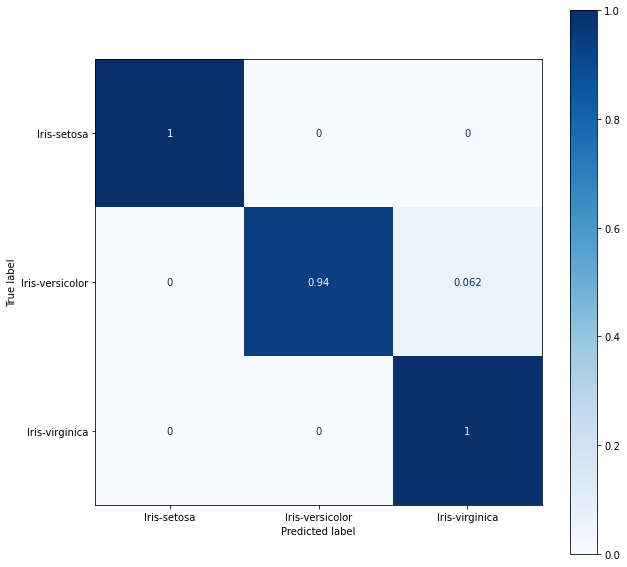

In [73]:
# plot confusion matrix 
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

Text(0.5, 1.0, 'Visualizing Important Features')

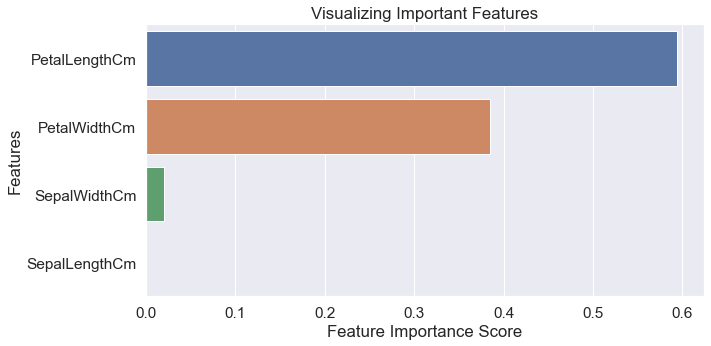

In [99]:
# plot feature important for decision tree
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# Creating a bar plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=feature_imp, y=feature_imp.index, ax=ax)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

## Visualize Decision Tree  

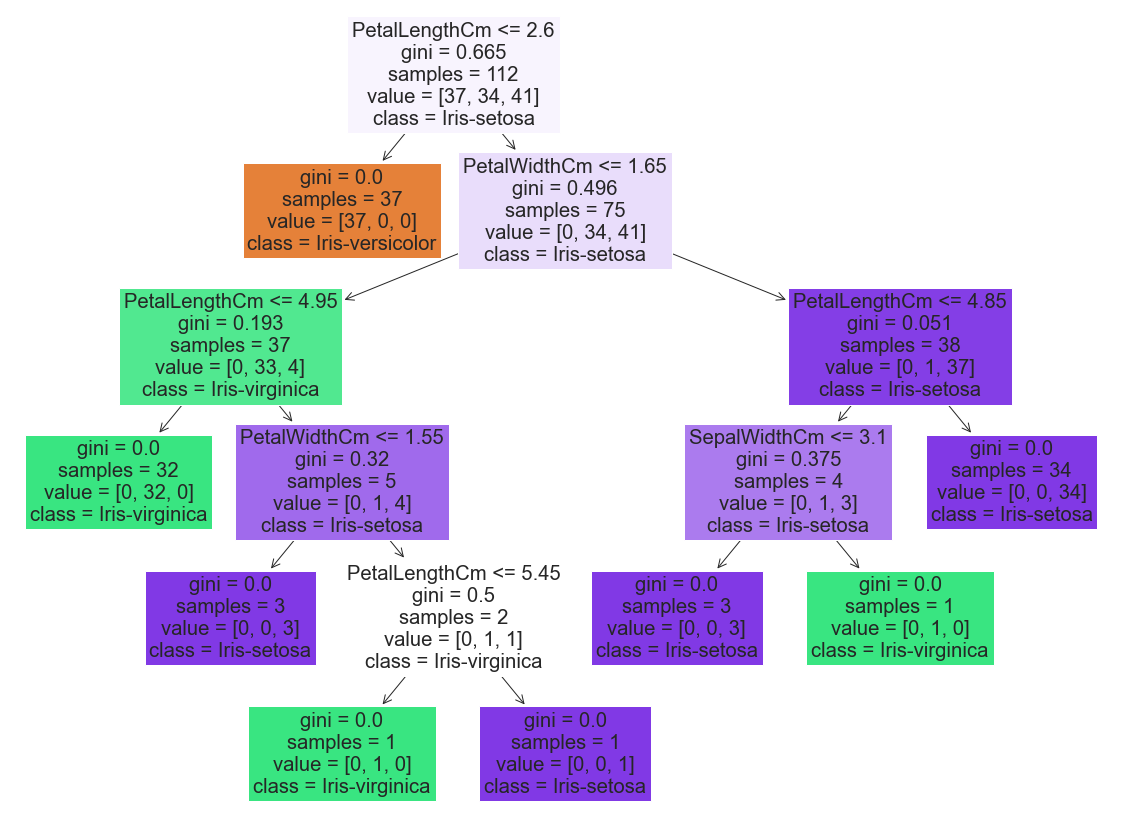

In [97]:
#  plot decision tree 
tree.plot_tree(model,feature_names= X.columns,  
                   class_names=list(set(y)),
                   filled=True)
plt.rcParams['figure.figsize'] = [20, 15]
plt.show() #